Dataset Shape: (20, 3)
                    Job Title             Company              Location
0          Senior AI Engineer            Catalant      🇺🇸 United States
1  Senior Full Stack Engineer  Snowplow Analytics             🇵🇱 Poland
2     Junior Network Engineer            Kyivstar                   All
3          Principal Engineer                Find  🌏 Probably worldwide
4      Senior Elixir Engineer  Sanctuary Computer           🌏 Worldwide

🔥 Most In-Demand Skills from Job Titles:
    Skill  Frequency
0  python          2


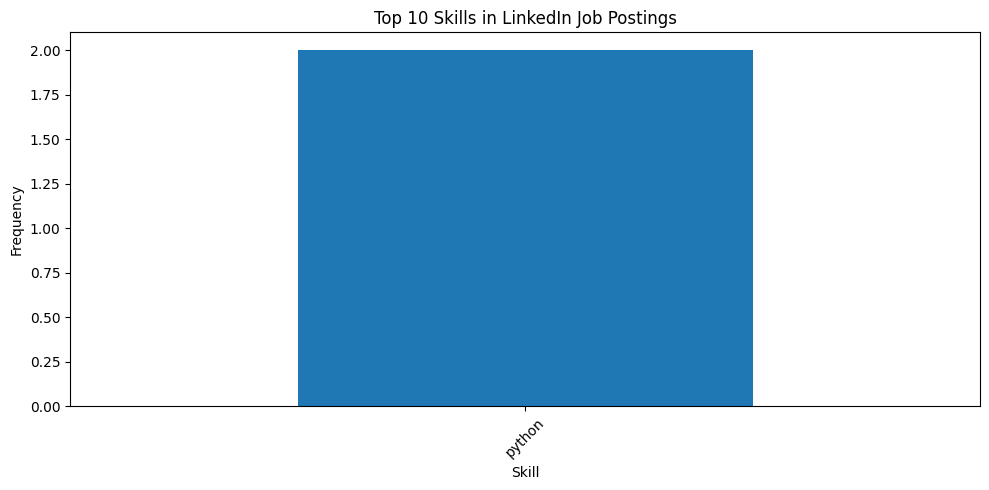

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load dataset
df = pd.read_csv("linkedin_jobs.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# Example skill list
skills_list = ["python", "sql", "excel", "java", "c++", "javascript",
               "machine learning", "deep learning", "django", "flask",
               "aws", "azure", "git", "html", "css"]

# Extract skills from Job Title (instead of Description)
def extract_skills(text, skills_list):
    if not isinstance(text, str):
        return []
    text = text.lower()
    return [skill for skill in skills_list if skill in text]

df["Extracted Skills"] = df["Job Title"].apply(lambda x: extract_skills(x, skills_list))

# Flatten skills for frequency analysis
all_skills = [skill for sublist in df["Extracted Skills"] for skill in sublist]
skill_counts = Counter(all_skills)

# Convert to DataFrame
df_skills = pd.DataFrame(skill_counts.items(), columns=["Skill", "Frequency"]).sort_values(by="Frequency", ascending=False)

print("\n🔥 Most In-Demand Skills from Job Titles:")
print(df_skills.head(5))

# Visualization
if not df_skills.empty:
    df_skills.head(5).plot(kind="bar", x="Skill", y="Frequency", figsize=(10,5), legend=False)
    plt.title("Top 10 Skills in LinkedIn Job Postings")
    plt.xlabel("Skill")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No skills matched in job titles.")
